# MS BigData 2015/2016

Catherine Verdier

In [107]:
#
# Importer les librairies nécessaires
#
import numpy as np
import matplotlib.pyplot as plt  # for plots
from sklearn import linear_model
from matplotlib import rc
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math, Latex
import statsmodels.api as sm
from scipy.stats import t
from numpy.linalg import inv
from sklearn import utils


In [108]:
#
# Initialisation plots, latex, ...
#
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'text.fontsize': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
mc3my_brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)

##############################################################################
# Scatter plot
#sns.set_style("white")


In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Exercice 1 : Régression multivariée
## Question 1
On cherche à trouver un estimateur linéaire de la concentration en ozone à partir des variables suivantes :
<ul>
    <li>le rayonnement solaire</li>
    <li>la force du vent</li>
    <li>la température</li>
    <li>la date de la mesure (correspondant à deux paramètres JJ et MM où JJ est le numéro du jour dans le<br>
    mois et MM les numéro du mois dans l'année)</li> 
</ul>
<br>
On cherchera cet estimateur en utilisant la méthode des moindres carrés multi-dimentionnels:

In [110]:
display(Math(r'$On~appelle~{y}_i,~la~valeur~de~la~concentration~en~ozone~pour~la~i^{ème}~observation$'))
display(Math(r'$On~appelle~{x}_{ij},~le~paramètre~de~la~colonne~j~de~la~i^{ème}~observation$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

On supposera qu'on dispose de p variales explicatives, i.e. j varie de 1 à p<br>
On supposera qu'on dispose de n observations, i.e. i varie de 1 à n<br>
L'estimateur des moindres carrés s'exprime alors par:

In [111]:
display(Math(r'$y_i = {\theta}_0^{*} + \sum_{j=1}^{p} {\theta}_j^{*}x_{ij} + {\epsilon}_i$'))
print("avec:")
display(Math(r'${\epsilon}_i = {\cal{N}}(0,{\sigma}^2)~~~~~~~~~~ \forall i = 1,...,n$'))


<IPython.core.display.Math object>

avec:


<IPython.core.display.Math object>

## Question 2
Récupération du jeu de données airquality

In [112]:
aq_data = sm.datasets.get_rdataset('airquality').data
aq_data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [113]:
print("Nombre d'observations :"+str(len(aq_data)))

Nombre d'observations :153


## Question 3
Elimination des lignes contenant des valeurs non définies

In [114]:
aq_data = aq_data.dropna()
aq_data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
6,23,299,8.6,65,5,7


In [115]:
print("Nombre d'observations :"+str(len(aq_data)))

Nombre d'observations :111


## Question 4

In [116]:
#
# Définir notre matrice X et notre vecteur y définis à la question 1
#
X = aq_data[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
y = aq_data['Ozone']
#
# Centrer/réduire les variables explicatives
#
X_mean = np.mean(X)
X_std = np.std(X)
Xcr = (X - X_mean)/X_std
Xcr.head()
#
# Calcul des paramètres de l'estimateur des moindres carrés avec scikit learn
#
skl_aq_data_ozone = linear_model.LinearRegression()
skl_aq_data_ozone.fit(Xcr, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Question 5
Paramètres du modèle linéaire trouvés avec scikit learn

In [117]:
theta0 = np.array([skl_aq_data_ozone.intercept_])
theta = np.concatenate((theta0,skl_aq_data_ozone.coef_),axis=0)
print theta

[ 42.0990991    4.56193076 -11.75277084  17.98521995  -4.45895297
   2.37393859]


In [118]:
display(Math(r'$\widehat\theta = \begin{bmatrix}'+r'{0}'.format(theta[0])+r'\\{0}'.format(theta[1])+r'\\{0}'.format(theta[2])+r'\\{0}'.format(theta[3])+r'\\{0}'.format(theta[4])+r'\\{0}'.format(theta[5])+r'\end{bmatrix}$'))

<IPython.core.display.Math object>

Formule théorique permettant d'obtenir un estimateur sans biais de la variance du bruit:

In [119]:
display(Math(r'$Var({\epsilon}_i)\approx{\widehat\sigma}^2 = \frac{{\left \| y - X{\widehat\theta} \right \|}^2_2}{n-rg(X)}~~~~~~~~ \forall i = 1,...,n$'))

<IPython.core.display.Math object>

Pour appliquer cette formule, on doit transformer la matrice X et lui ajouter une colonne de 1 pour prendre en compte le vecteur intercept $\widehat\theta_0$<br>
X est ici une matrice $n$x$(p+1)$ avec $x_{i0}$ = 1 pour tout i variant de 1 à n

In [120]:
#
# Calcul de l'estimateur de la variance du bruit
#

theta = np.array(theta,float)
# On peut appliquer la formule matricielle avec une matrice X_plus ([1_n]+X)
# Dans le cas considéré, on peut se permettre de calculer explicitement cette
# matrice car le volume des données est faible
# Si on opère sur une matrice à grande dimension, on se contentera d'ajouter 1
# au rang de la matrice initiale
X_plus = Xcr.copy()
if not 'Cst' in X_plus:
    X_plus.insert(0,'Cst',np.ones(X_plus.shape[0]))
sigma2 = (((y-np.dot(X_plus,theta.T))**2).sum())/(len(aq_data)-np.linalg.matrix_rank(X_plus))
display(Math(r'${\widehat\sigma}^2 ~~= '+r'{0}$'.format(sigma2)))

# On peut aussi calculer cette variance avec la fonction predict de sklearn
y_hat = skl_aq_data_ozone.predict(Xcr)
sigma2predict = ((((y-y_hat)**2).sum()))/(len(aq_data)-np.linalg.matrix_rank(X_plus))
display(Math(r'${\widehat\sigma}^2_{skl} = '+r'{0}$'.format(sigma2predict)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Question 6
Pour cette question, on admettra la Proposition 1 de l'énoncé :

In [121]:
display(Math(r'$\forall u \in {\mathbb{R}}^n~~~~ \frac{u^T(\widehat\theta-\theta^{*})}{\widehat\sigma\sqrt{u^T{(X^TX)}^{-1}u}}$'))

<IPython.core.display.Math object>

Cette proposition reste vraie si on l'applique à une famille de p+1 vecteurs $u_j$ orthonormés.<br>
Ce qui revient à dire que :

In [122]:
display(Math(r'$\frac{({\widehat\theta}_j-\theta^{*}_j)}{\widehat\sigma\sqrt{[{(X^TX)}^{-1}]_{jj}}} ~~~~~~suit~une~loi~de~Student~à~n-p-1~degrés~de~liberté~pour~j=1,...,p+1$'))

<IPython.core.display.Math object>

In [123]:
# Calcul d'un intervalle de confiance à 99% pour un degré de liberté n-p-1
n = Xcr.shape[0]
p = Xcr.shape[1]
student_interval = t.interval(0.99,n-p-1)
student_bound = student_interval[1]
# Dans le cas considéré, on peut calculer et inverser la matrice de Gram puisque p est petit devant n
# La matrice à inverser est de dimensions (6x6), ce qui est acceptable d'un point de vue computationnel
XTX = np.dot(X_plus.transpose(),X_plus)
XTX_1 = inv(XTX)
# Ecart-type pour les résidus
sigma_hat = np.sqrt(sigma2)
# Création des bornes inférieures des p+1 intervalles de confiance
student_inf_bound = theta-student_bound*sigma_hat*np.sqrt(np.diag(XTX_1))
# Création des bornes supérieures des p+1 intervalles de confiance
student_sup_bound = theta+student_bound*sigma_hat*np.sqrt(np.diag(XTX_1))
# Enregistrement des intervalles de confiance dans un DataFrame panda
theta_intervalles_99 = pd.DataFrame(index=X_plus.columns)
theta_intervalles_99['inf'] = student_inf_bound
theta_intervalles_99['sup'] = student_sup_bound
print
print("Intervalles de confiance à 99% par paramètre du modèle:")
theta_intervalles_99.head(6)


Intervalles de confiance à 99% par paramètre du modèle:


,inf,sup
Cst,36.905168,47.293030
Solar.R,-1.012992,10.136853
Wind,-17.741167,-5.764375
Temp,11.168540,24.801900
Month,-10.282812,1.364907
Day,-2.848751,7.596628


## Question 7
TODO

## Question 8

In [124]:
#
# Creation d'une nouvelle entrée
#
X_new = np.array([197., 10., 70., 3., 1.])
# centrer/réduire X_new avec moyenne et écart-type du dataset de fitting
X_new = (X_new-X_mean)/X_std
# Calcul de l'image de X_new 
y_new_hat = skl_aq_data_ozone.predict(X_new)
print("Avec les entrées suivantes:")
print(X_new)
print
print("Notre modèle prédit la concentration en ozone :")
print(y_new_hat)

Avec les entrées suivantes:
Solar.R    0.134429
Wind       0.017043
Temp      -0.821423
Month     -2.874467
Day       -1.724290
dtype: float64

Notre modèle prédit la concentration en ozone :
[ 36.46233787]


# Exercice 2 : Bootstrap

## Question 1

In [125]:
"""
    Définition des variables et fonctions utiles pour les différentes
    phases de Bootstrap à venir...
"""
#
# Noms des observations des modèles bootstrap
#
obs_names = ['Solar.R', 'Wind', 'Temp', 'Month', 'Day']
#
# Nom de l'explication
#
exp_name = 'Ozone'

#
# Création des matrices X et du vecteur y à partir d'un échantillon
# donné sous la forme d'un DataFrame panda
#
def getXy(sample):
    X = sample[obs_names]
    y = sample[exp_name]
    return X,y

#
# Calcul des tableaux de moyennes empiriques et écart-types empiriques
# sur les colonnes du Dataframe des observations
#
def getMeansAndStds(X):
    X_mean = np.mean(X)
    X_std = np.std(X)
    return X_mean, X_std

#
# Centrer/réduire les variables explicatives
#
def standardize(X):
    return (X - X.mean())/X.std()
    
#
# Faire une régression linéaire avec sklearn sur un sample donné
#
def linear_r(Xcr, y):
    skl = linear_model.LinearRegression()
    skl.fit(Xcr, y)
    return skl

#
# Régression linéraire sur un échantillon Bootstrap
# retourne les paramètres du modèle obtenus par une régression linéaire
#
def linear_r_bootstrap(mX):
    bootstrap = utils.resample(mX, replace=True)
    bX, by = getXy(bootstrap)
    means, stds = getMeansAndStds(bX)
    bX = standardize(bX)
    skl = linear_r(bX, by)
    theta0b = np.array([skl.intercept_])
    thetab = np.concatenate((theta0,skl.coef_),axis=0)
    return thetab


In [126]:
#
# On crée B Bootstrap sur lesquels on opère une régression linéaire
# On stocke les paramètres obtenus dans un DataFrame
#
B = 10000
theta_bootstrap = pd.DataFrame(columns=['Cste']+obs_names)

for i in range(0,B):
    theta = linear_r_bootstrap(aq_data)
    theta_bootstrap.loc[i] = theta
    if i % 1000 == 0 and i != 0:
        print str(i)+" linear regressions fitted with bootstrap samples ..."

print(str(len(theta_bootstrap))+" linear regressions fitted with bootstrap samples")
print("Done.")
print

#
# Check if parameters seams to be compliant with results found in Exercice 1
#
theta_bootstrap.head()

1000 linear regressions fitted with bootstrap samples ...
2000 linear regressions fitted with bootstrap samples ...
3000 linear regressions fitted with bootstrap samples ...
4000 linear regressions fitted with bootstrap samples ...
5000 linear regressions fitted with bootstrap samples ...
6000 linear regressions fitted with bootstrap samples ...
7000 linear regressions fitted with bootstrap samples ...
8000 linear regressions fitted with bootstrap samples ...
9000 linear regressions fitted with bootstrap samples ...
10000 linear regressions fitted with bootstrap samples
Done.



,Cste,Solar.R,Wind,Temp,Month,Day
0,42.099099,4.531391,-11.396258,19.634716,-4.687927,0.309914
1,42.099099,5.165506,-13.320020,16.485169,-1.568129,2.825026
2,42.099099,8.876946,-16.555462,18.958276,-3.272317,4.611870
3,42.099099,6.181574,-13.317497,16.212565,-2.424951,4.314477
4,42.099099,6.304150,-13.352247,17.783708,-3.337172,0.735959


In [127]:
print("==================")
print("Moyenne des thetas")
print("==================")
print(theta_bootstrap.mean())
print("=========================================")
print("Différence avec le modèle de l'exercice 1")
print("=========================================")
print(theta_bootstrap.mean()-theta)
print("==================")
print("Médiane des thetas")
print("==================")
print(theta_bootstrap.median())
print("=========================================")
print("Différence avec le modèle de l'exercice 1")
print("=========================================")
print(theta_bootstrap.median()-theta)

Moyenne des thetas
Cste       42.099099
Solar.R     4.580567
Wind      -11.823735
Temp       17.999524
Month      -4.476806
Day         2.379487
dtype: float64
Différence avec le modèle de l'exercice 1
Cste       8.618883e-12
Solar.R    1.144722e-01
Wind      -1.492088e-01
Temp       1.267693e+00
Month     -9.507144e-01
Day        1.977351e-01
dtype: float64
Médiane des thetas
Cste       42.099099
Solar.R     4.568025
Wind      -11.688972
Temp       18.032332
Month      -4.454587
Day         2.362506
dtype: float64
Différence avec le modèle de l'exercice 1
Cste       0.000000
Solar.R    0.101930
Wind      -0.014445
Temp       1.300501
Month     -0.928495
Day        0.180754
dtype: float64


## Question 2

Avec l'échantillon de modèles linéaires possibles obtenus, nous allons calculer un intervalle de confiance de niveau 99% pour chaque paramètre de régression à partir des quantiles empiriques de chaque paramètre.<br>

In [128]:
#
# Trouver les bornes d'un intervalle de confiance à partir de la fonction de répartition
# d'un échantillon
#
# Paramètres :
#     X          : échantillon considéré sous la forme d'un DataFrame panda
#     column     : nom de la colonne sur laquelle on va opérer
#     b_min      : percentile min
#     b_max      : percentile max

def ic_emp_q(X, column, b_min, b_max):
    # trier les données selon la colonne
    X_ic = X.sort(columns = column)
    # retrouver les percentiles correspondant
    p_min = np.percentile(X_ic[column], b_min)
    p_max = np.percentile(X_ic[column], b_max)
    return p_min, p_max

#
# On doit appliquer la fonction définie ci-dessus à chaque colonne de notre DataFrame
# obtenu par Bootstrap
# On rangera les résultats obtenus dans un DataFrame
#

theta_ic_99_v2 = pd.DataFrame(index=['Cste']+obs_names, columns=['inf', 'sup'])

for column in ['Cste']+obs_names:
    p_min, p_max = ic_emp_q(theta_bootstrap, column, 0.5, 99.5)
    theta_ic_99_v2['inf'][column] = p_min
    theta_ic_99_v2['sup'][column] = p_max

#
# Affichage du résultat
#
theta_ic_99_v2.head(6)


,inf,sup
Cste,42.0991,42.0991
Solar.R,0.02217537,9.467074
Wind,-20.11283,-5.093671
Temp,11.96791,24.08954
Month,-9.707456,0.6200753
Day,-3.097926,8.125438


In [129]:
#
# Vérification des résultats obtenus en utilisant DataFrame.quantile de panda
#
qt = theta_bootstrap.quantile([0.005, 0.995])

qt.head(10)

,Cste,Solar.R,Wind,Temp,Month,Day
0.005,42.099099,0.022175,-20.112833,11.967911,-9.707456,-3.097926
0.995,42.099099,9.467074,-5.093671,24.089544,0.620075,8.125438


## Question 3

,B,inf,sup,median
0,1,-11.396258,-11.396258,-11.396258
1,501,-20.349591,-4.759222,-11.537150
2,1001,-20.639330,-4.854503,-11.598506
3,1501,-20.085752,-4.972884,-11.641721
4,2001,-20.111651,-5.042093,-11.649955


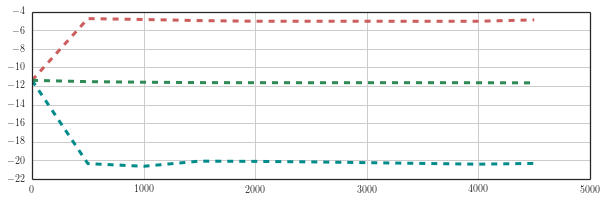

In [132]:
from matplotlib import colors
#
# Stocker les données à afficher dans un DataFrame
#
df_wind = pd.DataFrame(columns=['B', 'inf', 'sup', 'median'])
Bstep = 500
Blast = Bstep
for idx in range(1,5001,Bstep):
    Blast = idx+Bstep
    # prendre les poids des modèles pour la variable 'Wind' jusqu'à Blast
    X_Wind = theta_bootstrap['Wind'][0:idx]
    # Calculer l'intervalle de confiance pour ce dataset
    qtWind = X_Wind.quantile([0.005, 0.995])
    df_wind.loc[len(df_wind)] = {'B':idx, 'inf':qtWind[0.005], 'sup':qtWind[0.995], 'median':X_Wind.median()}
    
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(hspace=0.3)
plt.grid()
ax.plot(df_wind['B'], df_wind['inf'], "r--", color='darkcyan', linewidth=3)
ax.plot(df_wind['B'], df_wind['sup'], "r--", color='indianred', linewidth=3)
ax.plot(df_wind['B'], df_wind['median'], "r--", color='seagreen', linewidth=3)

df_wind.head()

## Question 4

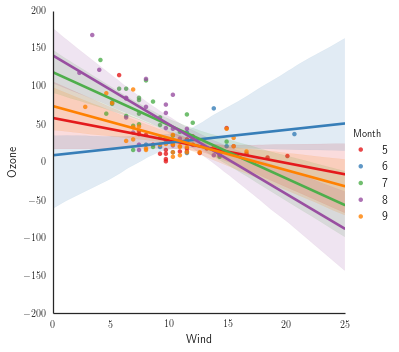

In [135]:
sns.lmplot(x="Wind", y="Ozone", hue="Month", data=aq_data, palette="Set1");